## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Shareability potential

In [1]:
import os
import pandas as pd
%load_ext autoreload
%autoreload 2
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __make the config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

In [5]:
params.gammdist.shape = 2
params.gammdist.scale = 500
params.gamma_imp.shape = 1.15
params.gamma_imp.scale = 3200
params.nP = 100
params.nCenters = 3
params.city = 'Amsterdam, Netherlands'
params.t0 = '17:00'
params = ExMAS.utils.make_paths(params)
ExMAS.utils.save_config(params, path = 'ExMAS/data/configs/potential.json')

In [6]:
params.t0 = pd.to_datetime(params.t0)

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [7]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [8]:
inData = ExMAS.utils.synthetic_demand_poly_II(inData, params)

4. __save requests__ 

In [9]:
inData.requests.to_csv('poly_demand.csv')

5. __load requests__ 

In [10]:
inData.requests = pd.read_csv('poly_demand.csv', index_col = 0)
inData.requests.treq = pd.to_datetime(inData.requests.treq)
inData.requests['pax_id'] = inData.requests.index.copy()
inData.requests.tarr = pd.to_datetime(inData.requests.tarr)
inData.requests.ttrav = pd.to_timedelta(inData.requests.ttrav)

5. __visualize demand__ 

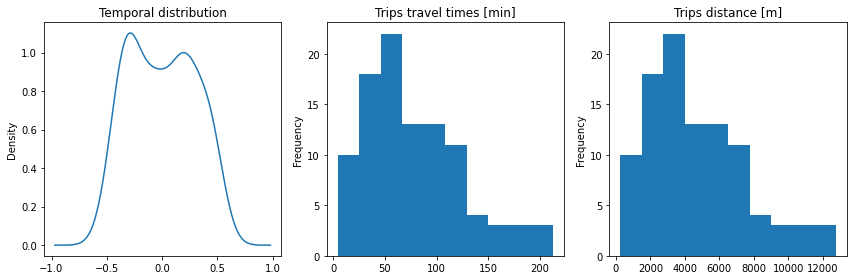

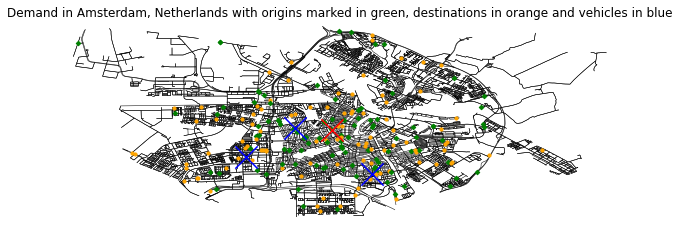

In [11]:
ExMAS.utils.plot_demand_poly(inData, params)

### run

22-08-20 13:41:50-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
22-08-20 13:41:50-INFO-creating combinations
22-08-20 13:41:50-INFO-9900	 nR*(nR-1)
22-08-20 13:41:50-INFO-3921	departure compatibility
22-08-20 13:41:50-INFO-1671	origins shareability
22-08-20 13:41:50-INFO-329	utility for i
22-08-20 13:41:50-INFO-64	utility for j
22-08-20 13:41:50-CRITICAL-FIFO pairs assertion failed
22-08-20 13:41:50-WARNING-         origin_i  destination_i  ttrav_i  treq_i     delta_i  dist_i   VoT_i  \
i  j                                                                            
56 77    46563125       46297072     1379    1979  773.142857   11035  0.0035   
75 71    46392399       46340763      263    2787  147.791209    2108  0.0035   
38 57  6367675392       46362707      883    1239  495.560440    7071  0.0035   
   63  6367675392       46362707      883    1239  495.560440    7071  0.0035   
62 60   896433130     1370956898     1068    2163  598.945055    8548  0.0035

AssertionError: 

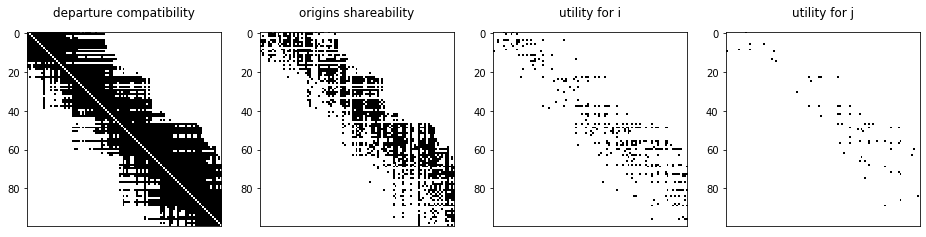

In [12]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [ ]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

 all feasible rides

---
(c) Rafał Kucharski, Delft, 2020